# Handwritten digit recognition using cnn (mnist dataset)

In [34]:
import keras

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [36]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten

In [37]:
import matplotlib.pyplot as plt

In [38]:
from keras.datasets import mnist

In [39]:
(X_train,y_train), (X_test,y_test)=mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
X_test.shape

(10000, 28, 28)

In [42]:
y_train.shape

(60000,)

In [43]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
y_test.shape

(10000,)

In [45]:
#since cnn takes inputs as image, so reshaping the training as well as test input datasets such that each data would be of shape (28,28,1)
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [46]:
X_train.shape

(60000, 28, 28, 1)

In [47]:
X_test.shape

(10000, 28, 28, 1)

In [48]:
#normalize inputs from 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255

In [49]:
#one hot encode output
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [50]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [51]:
#finding the number of output target classes
num_classes=y_test.shape[1]

In [52]:
num_classes

10

In [53]:
#defining a convolutional model with one convolutional layer and one pooling layer
def convolutional_model():
    model=Sequential()
    model.add(Conv2D(16, (5,5), strides=(1,1), activation="relu", input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100,activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [54]:
model=convolutional_model()

In [55]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 13s - loss: 0.2811 - accuracy: 0.9203 - val_loss: 0.1027 - val_accuracy: 0.9688
Epoch 2/10
300/300 - 12s - loss: 0.0833 - accuracy: 0.9751 - val_loss: 0.0598 - val_accuracy: 0.9808
Epoch 3/10
300/300 - 12s - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0506 - val_accuracy: 0.9827
Epoch 4/10
300/300 - 12s - loss: 0.0433 - accuracy: 0.9874 - val_loss: 0.0449 - val_accuracy: 0.9840
Epoch 5/10
300/300 - 12s - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0408 - val_accuracy: 0.9862
Epoch 6/10
300/300 - 12s - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0389 - val_accuracy: 0.9876
Epoch 7/10
300/300 - 12s - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 8/10
300/300 - 12s - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0394 - val_accuracy: 0.9867
Epoch 9/10
300/300 - 12s - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0418 - val_accuracy: 0.9872
Epoch 10/10
300/300 - 12s - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0377 - val_accura

In [56]:
scores=model.evaluate(X_test,y_test, verbose=0)

In [57]:
accuracy=scores[1]

In [58]:
error=1-scores[1]

In [59]:
print("accuracy:{} \n error:{}".format(accuracy,error))

accuracy:0.9868999719619751 
 error:0.013100028038024902


In [60]:
#defining a cnn model with two sets of convolutional and pooling layers and one deep connected neural network 
def convolutional_model2():
    model=Sequential()
    model.add(Conv2D(16, (5,5), strides=(1,1), activation="relu", input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(8, (2,2), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(100,activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [61]:
model2=convolutional_model2()

In [62]:
model2.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 14s - loss: 0.4663 - accuracy: 0.8692 - val_loss: 0.1358 - val_accuracy: 0.9596
Epoch 2/10
300/300 - 14s - loss: 0.1141 - accuracy: 0.9664 - val_loss: 0.0753 - val_accuracy: 0.9771
Epoch 3/10
300/300 - 14s - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 4/10
300/300 - 14s - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0574 - val_accuracy: 0.9811
Epoch 5/10
300/300 - 14s - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0446 - val_accuracy: 0.9855
Epoch 6/10
300/300 - 14s - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0505 - val_accuracy: 0.9828
Epoch 7/10
300/300 - 14s - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 8/10
300/300 - 14s - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 9/10
300/300 - 14s - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0354 - val_accuracy: 0.9880
Epoch 10/10
300/300 - 14s - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0365 - val_accura

In [63]:
scores2=model2.evaluate(X_test,y_test, verbose=0)
accuracy2=scores2[1]
error2=1-accuracy2


In [64]:
print("accuracy:{} \n error:{} for model2".format(accuracy2,error2))

accuracy:0.9873999953269958 
 error:0.01260000467300415 for model2


In [65]:
#finding the predicted target of X_test using model with one sets of convolutional and pooling layers (first model)
y_pred=model.predict(X_test)

In [66]:
y_pred

array([[7.66067920e-09, 6.05648225e-08, 6.36962682e-07, ...,
        9.99987721e-01, 2.89264914e-08, 7.17658850e-06],
       [2.75090284e-10, 3.93444495e-08, 1.00000000e+00, ...,
        1.42296710e-13, 1.23853749e-09, 4.07777670e-15],
       [3.36179210e-06, 9.99866962e-01, 7.17448347e-06, ...,
        5.13965051e-06, 1.11367081e-04, 1.15241665e-08],
       ...,
       [6.86953139e-14, 4.26957580e-09, 5.52796529e-15, ...,
        1.38682910e-09, 1.63601204e-08, 2.08169944e-08],
       [5.50900055e-11, 2.75447655e-12, 2.78245222e-12, ...,
        7.20937199e-12, 3.41662781e-06, 7.45813513e-13],
       [9.11587819e-12, 4.32308887e-15, 1.00321015e-10, ...,
        3.35181210e-19, 3.31974781e-10, 2.09351774e-15]], dtype=float32)

In [67]:
import numpy as np

In [68]:
y_pred_decimal=np.argmax(y_pred,axis=1)
y_test_decimal=np.argmax(y_test,axis=1)

In [69]:
y_pred_decimal

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [70]:
incorrect_predictions=(y_pred_decimal!=y_test_decimal).sum()
incorrect_predictions

131

In [71]:
pos_incorrect_pred=np.where(y_pred_decimal!=y_test_decimal)[0]
pos_incorrect_pred

array([ 282,  321,  340,  445,  448,  449,  582,  619,  659,  684,  720,
        740,  883,  938,  947, 1014, 1039, 1112, 1156, 1202, 1226, 1232,
       1242, 1247, 1260, 1319, 1326, 1393, 1500, 1522, 1527, 1530, 1553,
       1709, 1717, 1790, 1878, 1901, 1941, 2024, 2035, 2070, 2098, 2118,
       2130, 2135, 2185, 2272, 2280, 2326, 2369, 2387, 2406, 2414, 2462,
       2597, 2607, 2654, 2720, 2760, 2896, 2921, 2939, 2995, 3030, 3060,
       3172, 3384, 3422, 3503, 3520, 3558, 3601, 3604, 3662, 3727, 3796,
       3808, 3853, 3985, 4176, 4199, 4238, 4248, 4256, 4289, 4369, 4497,
       4507, 4578, 4639, 4740, 4761, 4807, 4814, 4823, 4838, 4860, 4956,
       4966, 5246, 5331, 5887, 5937, 5955, 5973, 5997, 6011, 6023, 6091,
       6532, 6571, 6576, 6597, 6625, 6651, 8094, 8246, 8408, 8527, 9009,
       9015, 9024, 9540, 9587, 9634, 9664, 9679, 9729, 9770, 9792],
      dtype=int64)

In [72]:
X_test.shape

(10000, 28, 28, 1)

In [73]:
X_test=X_test.reshape(-1,X_test.shape[1],X_test.shape[2])

In [74]:
X_test.shape

(10000, 28, 28)

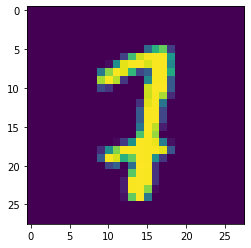

In [75]:
plt.imshow(X_test[pos_incorrect_pred[0]])

In [76]:
y_test[pos_incorrect_pred[0]]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [77]:
y_test_decimal[pos_incorrect_pred[0]]

7

In [78]:
y_pred_decimal[pos_incorrect_pred[0]]

3

In [79]:
model.save("convolutional_model1.h5")

In [80]:
model2.save("convolutional_model2.h5")